## Kaggle Competition | Titanic Machine Learning from Disaster | Exploratory Data Analysis

This notebook contains visualizations and other general information about the Titanic machine learning competition dataset on Kaggle. More information on this competition can be found [here](https://www.kaggle.com/c/titanic). The objective of this competition is to successfully predict whether or not a passenger survived on the Titanic.

Below are both univariate and bivariate plots of multiple features in the dataset. I use pandas for data munging and cleaning, and matplotlib/seaborn for visualization. Also, below is a list of the dataset's features and their descriptions.


Variable	| Definition	| Key | 
-----------  | ------------ | -------- | 
Survived	| Survival	| 0 = No, 1 = Yes
Pclass	| Ticket class	| 1 = 1st, 2 = 2nd, 3 = 3rd
Sex	| Sex | 	|
Age	| Age in years	|
Sibsp	| # of siblings / spouses aboard the Titanic	|
Parch	| # of parents / children aboard the Titanic	|
Ticket	| Ticket number	| | 
Fare	| Passenger fare	| | 
Cabin	| Cabin number	| | 
Embarked	| Port of Embarkation | 	C = Cherbourg, Q = Queenstown, S = Southampton | 

In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### General Stats and Overview

Starting off by setting the seaborn `whitegrid` style with `muted` colors and ignoring any `RuntimeWarning` warnings.

In [2]:
warnings.filterwarnings('ignore', category=RuntimeWarning)
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette("muted", 10))

In [3]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

There are 891 passengers in the training dataset with 12 features total. There are 418 passengers with 11 features toatl in the test dataset.

In [4]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


Below are the column names in the training dataset, a high-level overview of their datatypes, and summary stats for all numerical features.

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Before moving any further, I map the `Survived` feature to text categories so the plot legends more understandable.

In [8]:
train_df.Survived = train_df.Survived.map({1: 'Survived', 0: 'Died'})

### Univariate Plots

First, I count how many null values there are in each columns and plot them to see which features don't have much data in them. `Cabin` is almost completely empty and `Age` is missing a little less than a quarter of total values. A similar issue can be seen in the test set. I may not use `Cabin` in my model since data in this feature is very scarce.

In [9]:
def get_col_null_counts(df):
    return pd.DataFrame(sorted({c: df[c].isnull().sum() for c in df.columns}.items(), key=lambda x: x[1], 
                               reverse=True), columns=['Column', 'Null Count'])

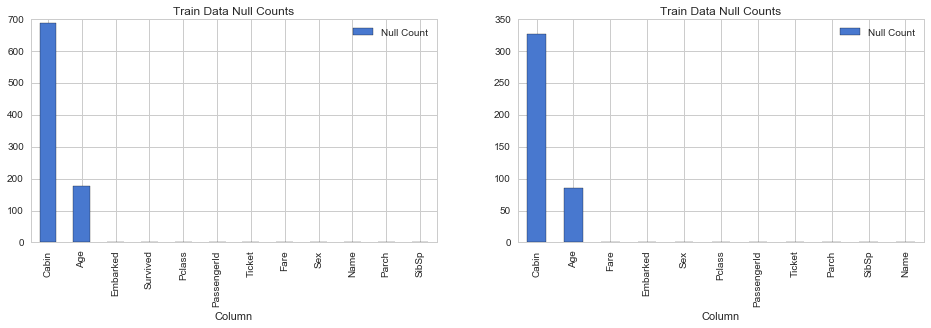

In [10]:
f, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(16, 4))
get_col_null_counts(train_df).plot(kind='bar', x='Column', y='Null Count', 
                                  title='Train Data Null Counts', ax=ax1)
get_col_null_counts(test_df).plot(kind='bar', x='Column', y='Null Count', 
                                 title='Train Data Null Counts', ax=ax2);

Below are histogram plots of `Fare`, `Age`, `Sibsp`, and `Parch`. `Sibsp` represents the number of siblings or spouses a passenger has and `Parch` represents the number of children or parents a passenger has. Couple of key takeaways below. 

* Most tickets were between 0-100.
* Age is relatively Gaussian, but has lots of peaks. Average age is around 30 years old.
* Most passengers have 0 siblings or spouses although one person has 8!
* Most passengers have 0 parents or children.

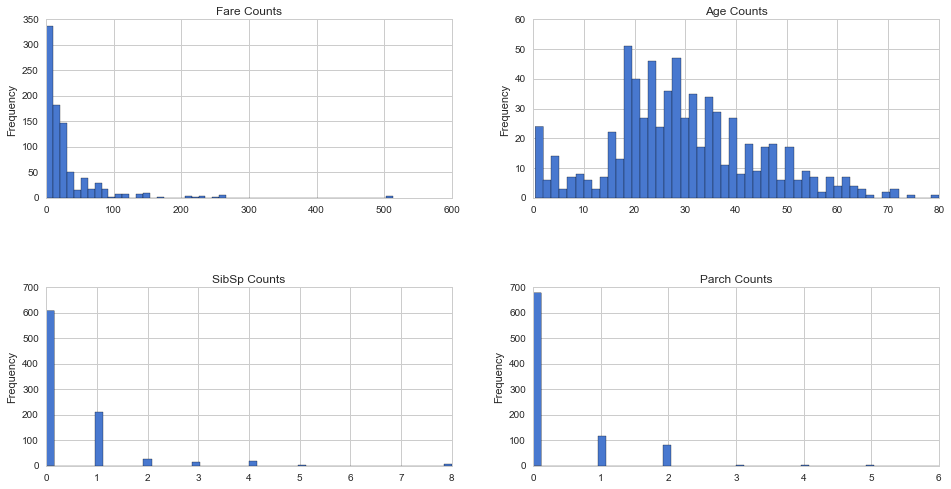

In [11]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(16, 8))
train_df.Fare.plot(kind='hist', bins=50, ax=ax1, title='Fare Counts')
train_df.Age.plot(kind='hist', bins=50, ax=ax2, title='Age Counts')
train_df.SibSp.plot(kind='hist', bins=50, ax=ax3, title='SibSp Counts')
train_df.Parch.plot(kind='hist', bins=50, ax=ax4, title='Parch Counts')
f.subplots_adjust(hspace=0.5);

Below are bar plots for the categorical variables in the dataset. Key takeways below. 

* The largest class was the lower class.
* Most passengers boarded the Titanic in Southampton, which is on the southern coast of England.
* There were almost 50% more male passengers than females.
* Over 50% of the passengers died when the Titanic crashed.

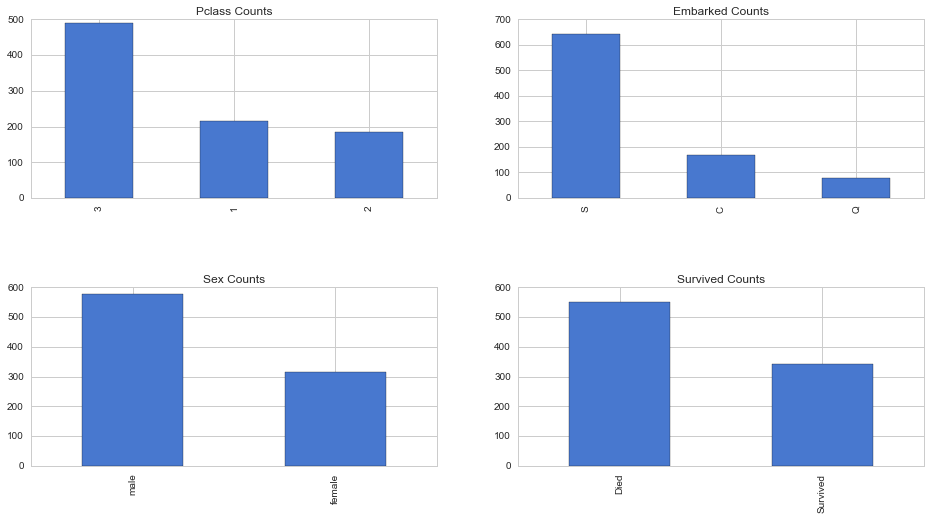

In [12]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, sharex=False, sharey=False, figsize=(16, 8))
train_df.Pclass.value_counts().plot(kind='bar', ax=ax1, title='Pclass Counts')
train_df.Embarked.value_counts().plot(kind='bar', ax=ax2, title='Embarked Counts')
train_df.Sex.value_counts().plot(kind='bar', ax=ax3, title='Sex Counts')
train_df.Survived.value_counts().plot(kind='bar', ax=ax4, title='Survived Counts')
f.subplots_adjust(hspace=0.5);

Below I extract the surname from the `Name` category to group each passenger into a particular name category rather than using the `Name` feature itself. This helped me find a couple of duplicate surnames (Mme and Mrs, Miss and Ms, etc.). 

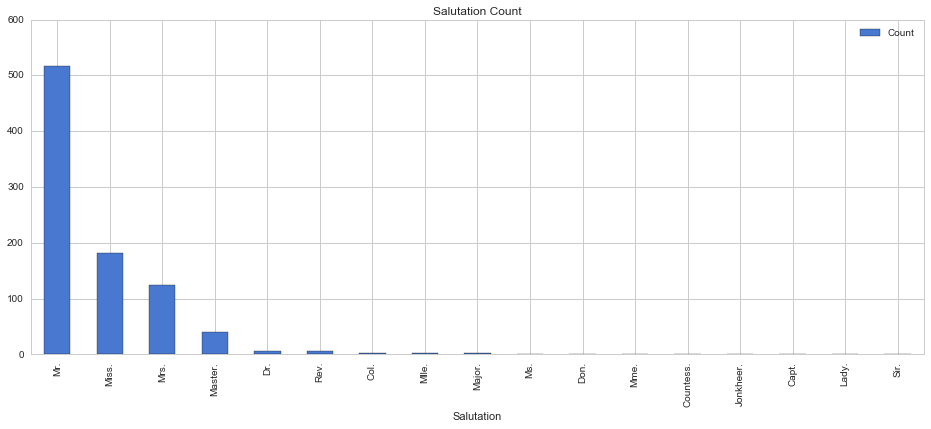

In [13]:
from collections import Counter
split_names = train_df.Name.str.split(',', expand=True)
surname_df = split_names[1].str.extract('([A-Za-z]+\.)', expand=True)
surname_counts = pd.DataFrame(sorted(Counter(surname_df[0]).items(), 
                                    key=lambda x: x[1], reverse=True), columns=['Salutation', 'Count'])
surname_counts.plot(kind='bar', x='Salutation', y='Count', figsize=(16, 6), title='Salutation Count');

### Bivariate Plots

In [14]:
def label_categories(df, categorical_cols):
    return pd.get_dummies(df, columns=categorical_cols, drop_first=True)

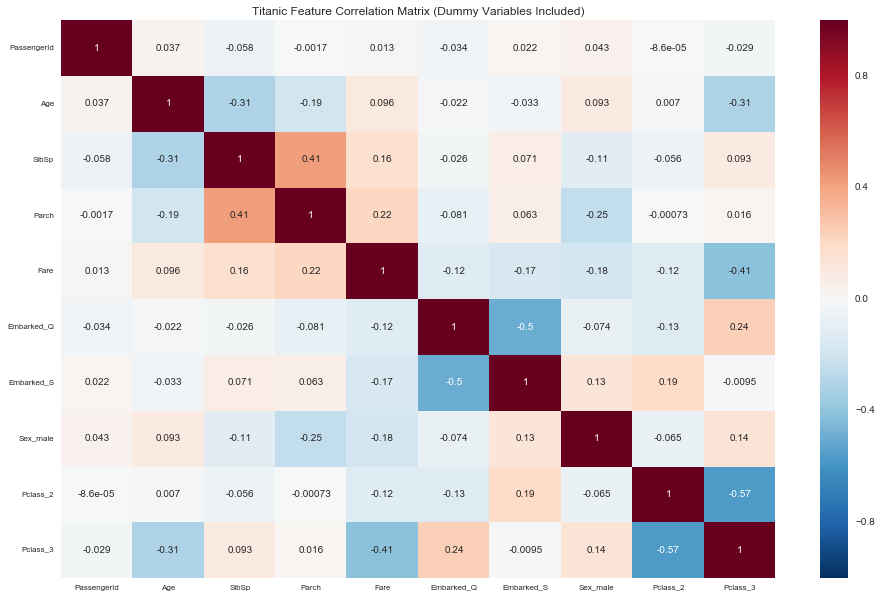

In [15]:
f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(label_categories(train_df, ['Embarked', 'Sex', 'Pclass']).corr(), ax=ax, annot=True)
ax.tick_params(labelsize=8);
plt.title('Titanic Feature Correlation Matrix (Dummy Variables Included)');

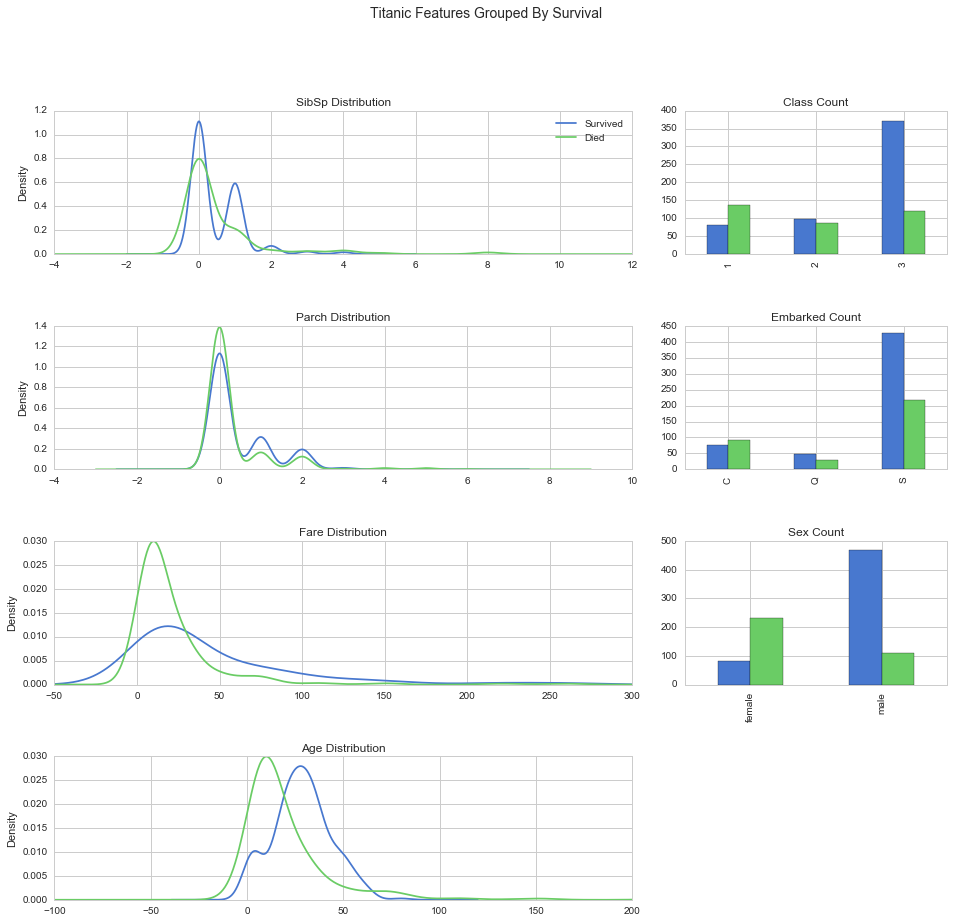

In [25]:
plt.figure(figsize=(16, 18))

ax1 = plt.subplot2grid((5, 3), (0, 0), colspan=2)
train_df.SibSp[train_df.Survived == 'Survived'].plot(kind='kde')
train_df.SibSp[train_df.Survived == 'Died'].plot(kind='kde')
ax1.set_title('SibSp Distribution')
ax1.legend(('Survived', 'Died'), loc='best')

ax2 = plt.subplot2grid((5, 3), (1, 0), colspan=2)
train_df.Parch[train_df.Survived == 'Survived'].plot(kind='kde')
train_df.Parch[train_df.Survived == 'Died'].plot(kind='kde')
ax2.set_title('Parch Distribution')

ax3 = plt.subplot2grid((5, 3), (0, 2))
train_df.groupby(['Survived', 'Pclass']).count().unstack('Survived').PassengerId.plot(kind='bar', 
                                                                                      ax=ax3,
                                                                                      title='Class Count', 
                                                                                      legend=False)
ax3.set_xlabel('')

ax4 = plt.subplot2grid((5, 3), (1, 2))
train_df.groupby(['Survived', 'Embarked']).count().unstack('Survived').PassengerId.plot(kind='bar', 
                                                                                        ax=ax4, 
                                                                                        title='Embarked Count', 
                                                                                        legend=False)
ax4.set_xlabel('')

ax5 = plt.subplot2grid((5, 3), (2, 2))
train_df.groupby(['Survived', 'Sex']).count().unstack('Survived').PassengerId.plot(kind='bar', 
                                                                                   ax=ax5, 
                                                                                   title='Sex Count', 
                                                                                   legend=False)
ax5.set_xlabel('')

ax6 = plt.subplot2grid((5, 3), (2, 0), colspan=2)
train_df.Fare[train_df.Survived == 'Survived'].plot(kind='kde')
train_df.Fare[train_df.Survived == 'Died'].plot(kind='kde')
ax6.set_xlim(-50, 300)
ax6.set_title('Fare Distribution')

ax7 = plt.subplot2grid((5, 3), (3, 0), colspan=2)
train_df.Age[train_df.Survived == 'Survived'].plot(kind='kde')
train_df.Fare[train_df.Survived == 'Died'].plot(kind='kde')
ax7.set_xlim(-100, 200)
ax7.set_title('Age Distribution');

plt.suptitle('Titanic Features Grouped By Survival', fontsize=14)
plt.subplots_adjust(hspace=0.5);

In [17]:
train_df['LetterTickets'] = train_df.Ticket.astype(str).str.extract('([A-Za-z]+)', expand=False)
train_df.loc[train_df.LetterTickets.isnull(), 'LetterTickets'] = 'Other'

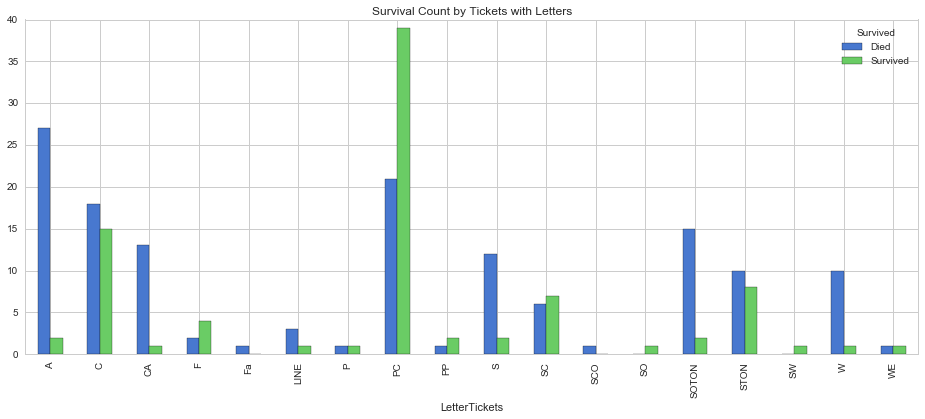

In [18]:
train_df[train_df.LetterTickets != 'Other'].groupby(['Survived', 'LetterTickets'])\
    .count().unstack('Survived').PassengerId.plot(kind='bar', 
                                                  figsize=(16, 6), 
                                                  title='Survival Count by Tickets with Letters');

In [19]:
train_df['GroupedAge'] = pd.cut(train_df.Age, 5)
train_df['GroupedAge2'] = pd.cut(train_df.Age, 10)

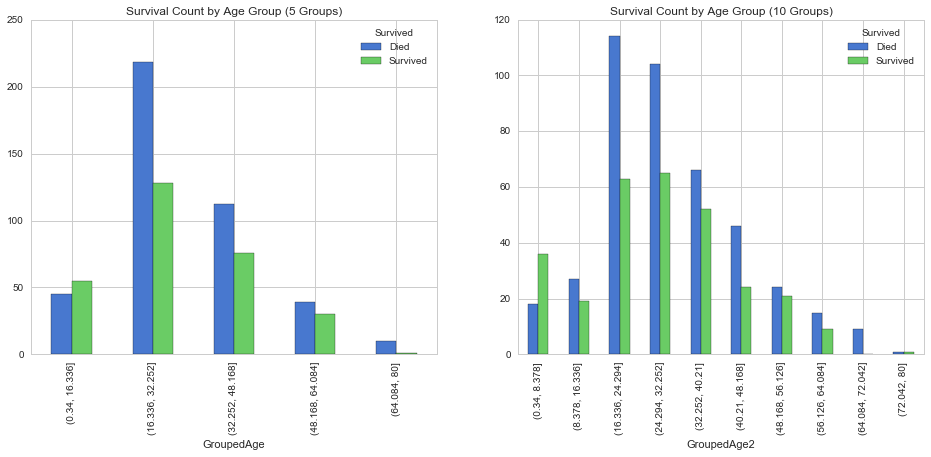

In [20]:
f, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(16, 6))
train_df.groupby(['Survived', 'GroupedAge'])\
    .count().unstack('Survived').PassengerId.plot(kind='bar', 
                                                  ax=ax1, 
                                                  title='Survival Count by Age Group (5 Groups)')
train_df.groupby(['Survived', 'GroupedAge2'])\
    .count().unstack('Survived').PassengerId.plot(kind='bar', 
                                                  ax=ax2, 
                                                  title='Survival Count by Age Group (10 Groups)');

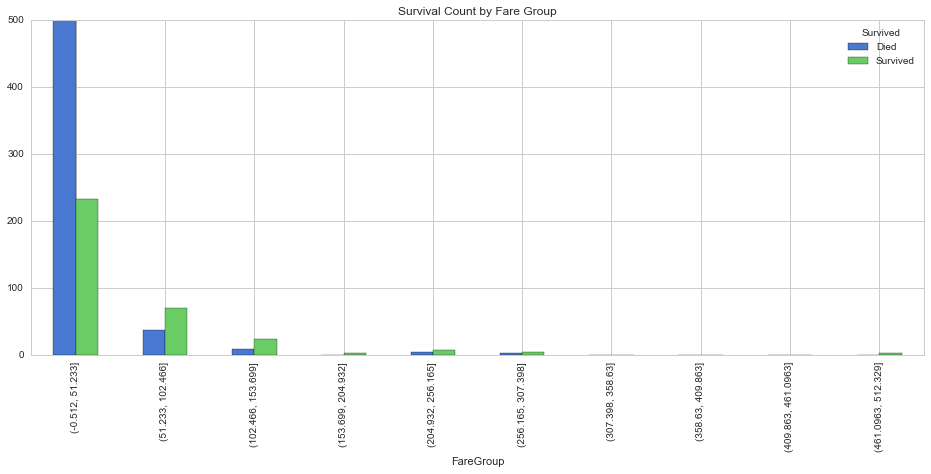

In [21]:
train_df['FareGroup'] = pd.cut(train_df.Fare, 10)
train_df.groupby(['Survived', 'FareGroup'])\
    .count().unstack('Survived').PassengerId.plot(kind='bar', 
                                                  figsize=(16, 6), 
                                                  title='Survival Count by Fare Group');